# .NET Initialization
<div style="width:100%;height:6px;background-color:Black;"></div>

In [1]:
import clr
clr.AddReference(r"..\bin\MiniSim.Core")

import MiniSim.Core.Expressions as expr
import MiniSim.Core.Flowsheeting as fl
import MiniSim.Core.Numerics as num
import MiniSim.Core.UnitsOfMeasure as uom
import MiniSim.Core.ModelLibrary as lib
import MiniSim.Core.PropertyDatabase as chemsep
from MiniSim.Core.Reporting import Generator, StringBuilderLogger
import MiniSim.Core.Thermodynamics as thermo



In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['grid.color'] = 'k'

# Set up Thermodynamics
<div style="width:100%;height:6px;background-color:Black;"></div>

In [4]:
Database = chemsep.ChemSepAdapter()
logger = StringBuilderLogger()
reporter = Generator(logger)

sys= thermo.ThermodynamicSystem("Test2","NRTL", "default")
Database.ListComponents("Benze")

['1,2,4-trichlorobenzene',
 'M-dichlorobenzene',
 'O-dichlorobenzene',
 'P-dichlorobenzene',
 'Bromobenzene',
 'Monochlorobenzene',
 'Iodobenzene',
 'Nitrobenzene',
 'Benzene',
 'Ethylbenzene',
 'N-propylbenzene',
 'N-butylbenzene',
 '1,2,3-trimethylbenzene',
 '1,2,4-trimethylbenzene',
 'Isobutylbenzene',
 'Sec-butylbenzene',
 'Tert-butylbenzene',
 'O-diethylbenzene',
 'M-diethylbenzene',
 'P-diethylbenzene',
 '1,2,3,4-tetramethylbenzene',
 '1,2,3,5-tetramethylbenzene',
 '1,2,4,5-tetramethylbenzene',
 '1-methyl-3-n-propylbenzene',
 '1-methyl-4-n-propylbenzene',
 'P-diisopropylbenzene']

In [5]:
#sys.AddComponent(Database.FindComponent("Benzene"))
#sys.AddComponent(Database.FindComponent("Toluene"))
#sys.AddComponent(Database.FindComponent("P-xylene"))
#sys.AddComponent(Database.FindComponent("Water"))

sys.AddComponent(Database.FindComponent("Isobutene"))
sys.AddComponent(Database.FindComponent("Methanol"))
sys.AddComponent(Database.FindComponent("N-butane"))
sys.AddComponent(Database.FindComponent("Acetone"))
sys.AddComponent(Database.FindComponent("Chloroform"))

Database.FillBIPs(sys)

In [6]:
sys.VariableFactory.SetOutputDimension(uom.PhysicalDimension.HeatFlow, uom.SI.MW)
sys.VariableFactory.SetOutputDimension(uom.PhysicalDimension.Pressure, uom.METRIC.bar)

In [7]:
names=sys.GetComponentIds()
longnames=sys.GetComponentNames()
cas= sys.GetComponentCASNumbers()
mw= sys.GetComponentMolarWeights()
numComps=len(sys.Components)

df_data=pd.DataFrame(zip(longnames, cas, mw), index= names, columns= ["Name","CASNo","MolarWeight"])
df_data

,Name,CASNo,MolarWeight
Isobutene,Isobutene,115-11-7,56.10632
Methanol,Methanol,67-56-1,32.04186
N-butane,N-butane,106-97-8,58.12220
Acetone,Acetone,67-64-1,58.07914
Chloroform,Chloroform,67-66-3,119.37760


# Pure Component Properties
<div style="width:100%;height:6px;background-color:Black;"></div>

In [8]:
calc= thermo.ThermodynamicCalculator(sys)

In [9]:
Tmin=0
Tmax=400
steps=41
Tvec= np.linspace(Tmin+273.15,Tmax+273.15,steps)

## Vapor Pressure

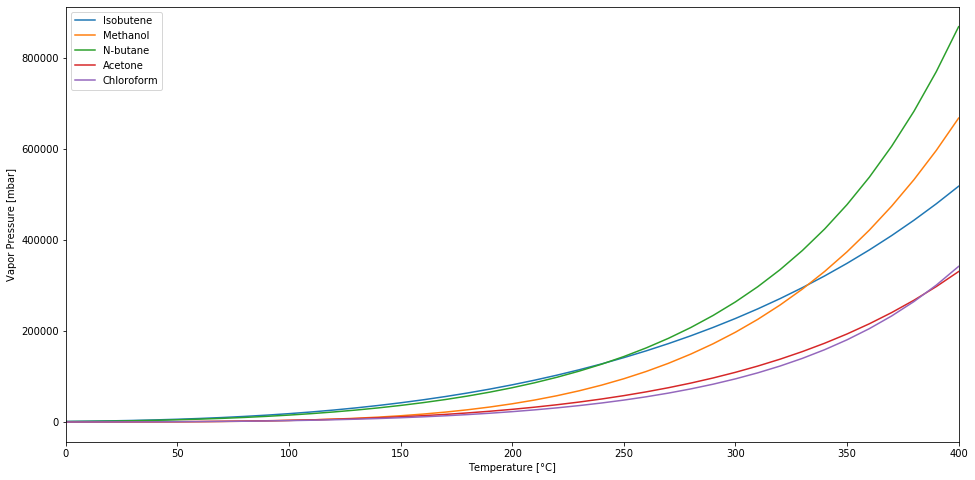

In [10]:
value_matrix={}

for c in names:
    values=[]
    for T in Tvec:
        y= calc.GetPureComponentProperty(c, "VP",T)/100
        values.append(y)
    value_matrix[c]=values


#value_matrix
df_vp= pd.DataFrame(value_matrix, index=Tvec-273.15)
df_vp.plot()
plt.xlabel("Temperature [°C]")
plt.ylabel("Vapor Pressure [mbar]");

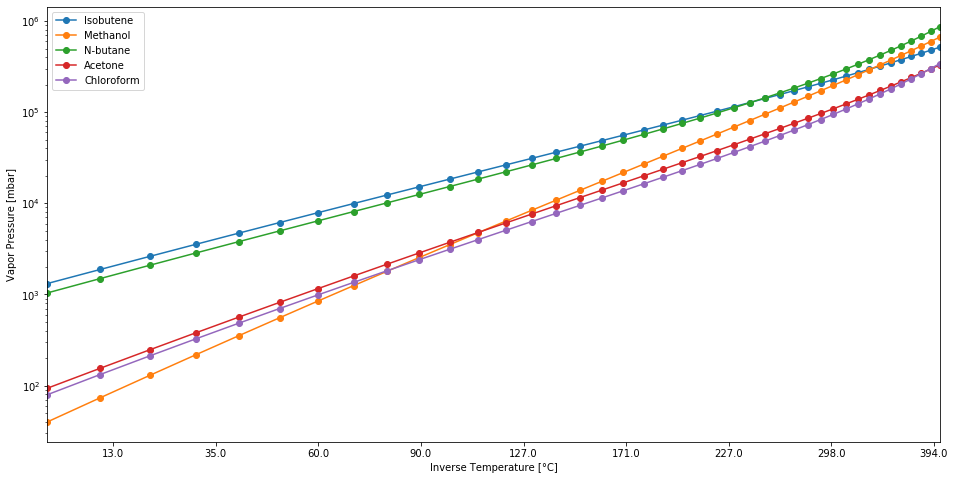

In [11]:
df_vp.loc[:,'InverseT']= 1.0/Tvec
df_vp.plot(logy=True,x= 'InverseT',marker='o')
plt.ylabel('Vapor Pressure [mbar]');
plt.xlabel('Inverse Temperature [°C]');  

ticks=plt.gca().get_xticks()
plt.gca().set_xticklabels(np.round(1.0/ticks-273.15,0));
plt.gca().invert_xaxis();

## Density

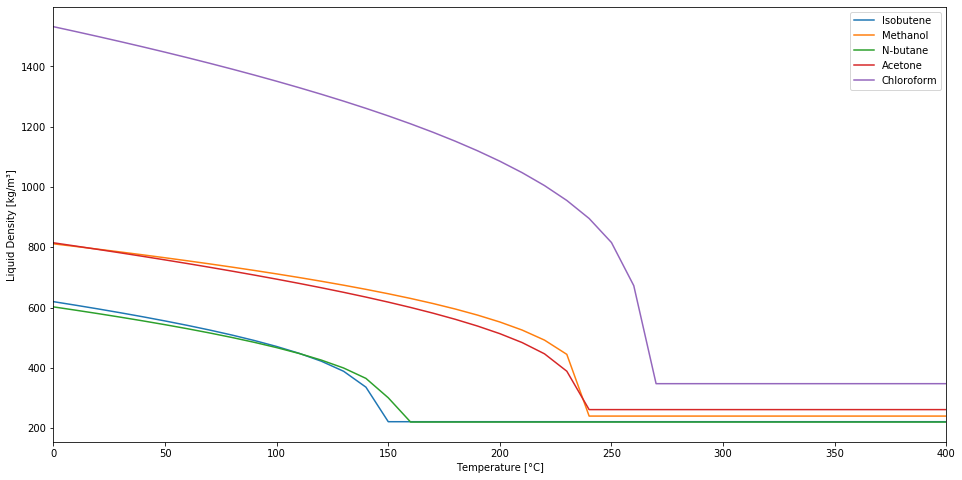

In [12]:
value_matrix={}

for c in range(len(names)):
    values=[]
    for T in Tvec:
        y= calc.GetPureComponentProperty(names[c], "DENL",T)*mw[c]/1000
        values.append(y)
    value_matrix[names[c]]=values


#value_matrix
df= pd.DataFrame(value_matrix, index=Tvec-273.15)
df.plot()
plt.xlabel("Temperature [°C]")
plt.ylabel("Liquid Density [kg/m³]");

## Ideal Gas Heat Capacity

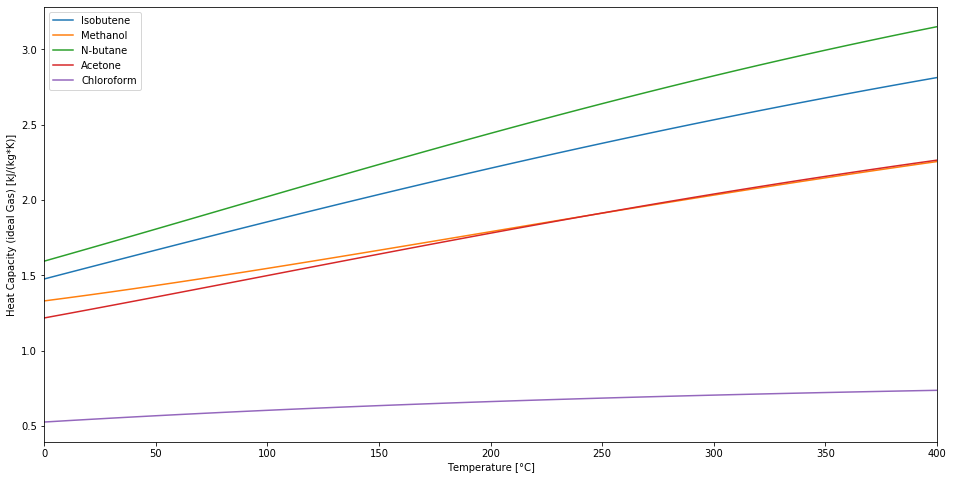

In [13]:
value_matrix={}

for c in range(len(names)):
    values=[]
    for T in Tvec:
        y= calc.GetPureComponentProperty(names[c], "CPID",T)/mw[c]
        values.append(y)
    value_matrix[names[c]]=values


#value_matrix
df= pd.DataFrame(value_matrix, index=Tvec-273.15)
df.plot()
plt.xlabel("Temperature [°C]")
plt.ylabel("Heat Capacity (ideal Gas) [kJ/(kg*K)]");

## Liquid Heat Capacity

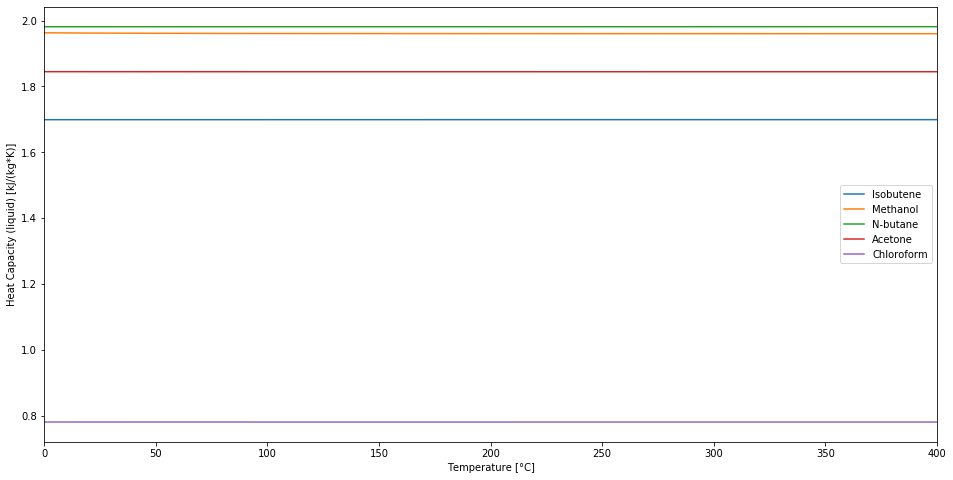

In [14]:
value_matrix={}

for c in range(len(names)):
    values=[]
    for T in Tvec:
        y= calc.GetPureComponentProperty(names[c], "CL",T)/mw[c]
        values.append(y)
    value_matrix[names[c]]=values


#value_matrix
df= pd.DataFrame(value_matrix, index=Tvec-273.15)
df.plot()
plt.xlabel("Temperature [°C]")
plt.ylabel("Heat Capacity (liquid) [kJ/(kg*K)]");

## Heat of Vaporization

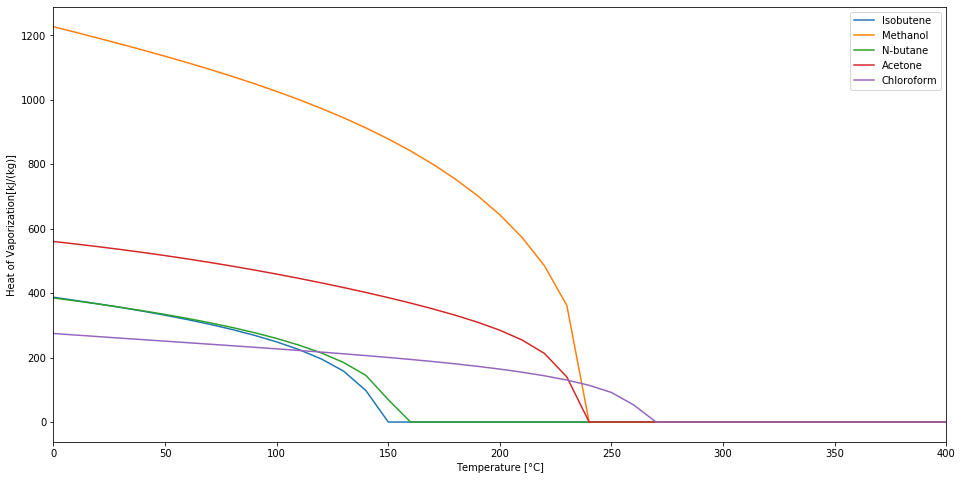

In [15]:
value_matrix={}

for c in range(len(names)):
    values=[]
    for T in Tvec:
        y= calc.GetPureComponentProperty(names[c], "HVAP",T)/mw[c]
        values.append(y)
    value_matrix[names[c]]=values


#value_matrix
df= pd.DataFrame(value_matrix, index=Tvec-273.15)
df.plot()
plt.xlabel("Temperature [°C]")
plt.ylabel("Heat of Vaporization[kJ/(kg)]");

# Enthalpy Curves
<div style="width:100%;height:6px;background-color:Black;"></div>

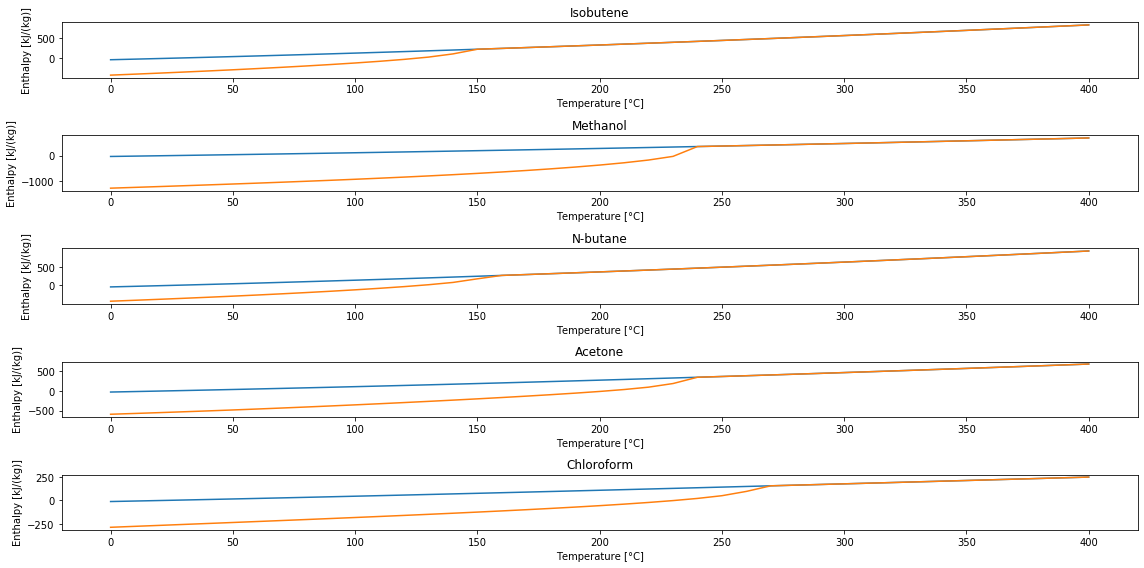

In [16]:
fig, axs =plt.subplots(len(names))

for c in range(len(names)):
    valuesV=[]
    valuesL=[]
    for T in Tvec:
        yV= calc.GetEnthalpy(names[c], "v",T)/mw[c]
        yL= calc.GetEnthalpy(names[c], "l",T)/mw[c]
        valuesV.append(yV)
        valuesL.append(yL)    
    axs[c].plot(Tvec-273.15,valuesV)
    axs[c].plot(Tvec-273.15,valuesL)
    axs[c].set_xlabel("Temperature [°C]")
    axs[c].set_ylabel("Enthalpy [kJ/(kg)]");
    axs[c].set_title(names[c])
    plt.tight_layout()
#value_matrix
#df= pd.DataFrame(value_matrix, index=Tvec-273.15)
#df.plot(subplots=True)


# Binary System Analysis
<div style="width:100%;height:6px;background-color:Black;"></div>

## (x,y)-Plots

In [17]:
psys=1000.0

mixture= fl.MaterialStream("Mix", sys)
mixture.Specify("VF",0.0)
mixture.Specify("P",psys, uom.METRIC.mbar)
for c in names:
    mixture.Specify("n["+c+"]",1.0)
mixture.InitializeFromMolarFlows()
mixture.FlashPZ()

flow= fl.Flowsheet("test")
flow.AddMaterialStream(mixture)

In [18]:
logger= StringBuilderLogger()
solver= num.DecompositionSolver(logger)
solver.SuppressNewtonLogging=True
result=solver.Solve(flow)
print(logger.Flush())

Decomposition Result: V=29, E=29, Blocks=14, Singletons=12
Block Statistics:
   # Var # Blocks % Blocks
       1       12  85,71 %
       6        1   7,14 %
      11        1   7,14 %
Problem NLAES was successfully solved (0,01 seconds)



Wall time: 1.55 s


Text(0.5, 1.05, '(x,y)-Diagram at 1000.0 mbar')

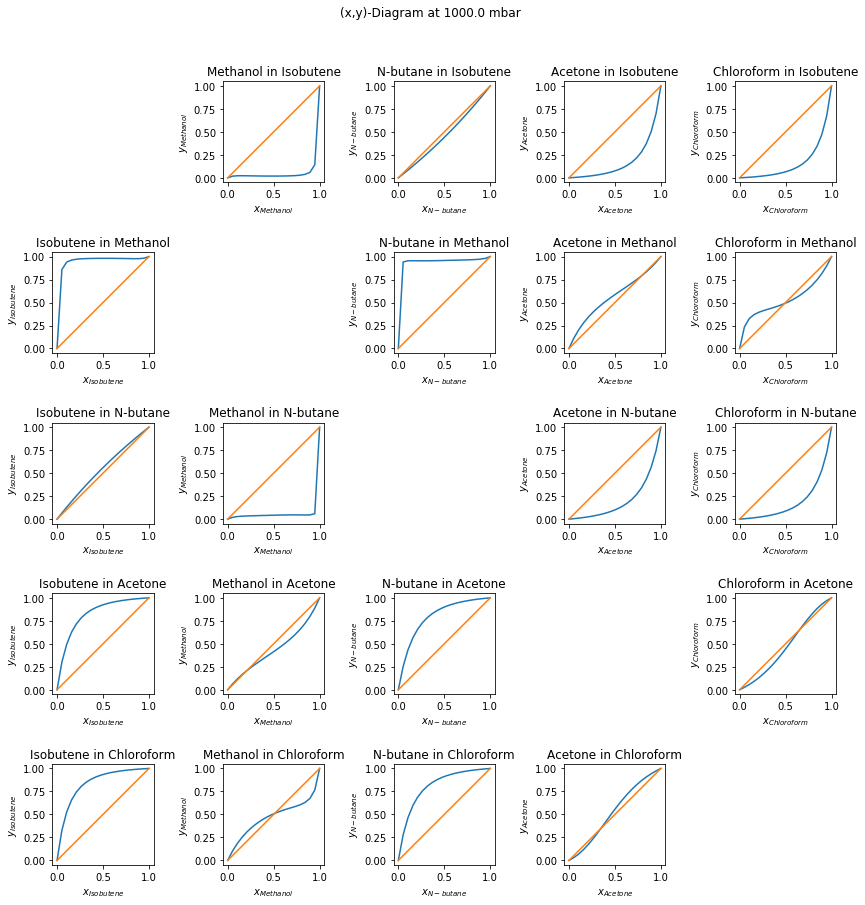

In [19]:
%%time
selectedComps=range(numComps)
numSelComps=len(selectedComps)
numSteps=20


fig,axs=plt.subplots(numSelComps,numSelComps,figsize=(12,12))
for i in range(numSelComps):
    for j in range(numSelComps):       
        if j!=i:
            xvec=[]
            yvec=[]
            for c in range(numSteps):
                for k in range(numComps):                    
                    mixture.Specify("n["+names[k]+"]",0.0)
                mixture.Specify("n["+names[i]+"]",c/(numSteps-1))
                mixture.Specify("n["+names[j]+"]",1.0-c/(numSteps-1))
                mixture.InitializeFromMolarFlows()
                mixture.FlashPZ()
                solver.Solve(flow)                               
                xvec.append(mixture.GetVariable('xL['+names[selectedComps[j]]+']').Val())               
                yvec.append(mixture.GetVariable('xV['+names[selectedComps[j]]+']').Val())               
            axs[i,j].plot(xvec, yvec)
            axs[i,j].plot(xvec, xvec)  
            #axs[i,j].legend([names[selectedComps[j]]])
            axs[i,j].set_title(names[selectedComps[j]] +' in '+names[selectedComps[i]])
            axs[i,j].set_xlabel('$x_{'+names[selectedComps[j]]+'}$')       
            axs[i,j].set_ylabel('$y_{'+names[selectedComps[j]]+'}$')
            axs[i, j].set_aspect('equal', 'box')
        else:
            axs[i, j].axis('off')        
    
plt.tight_layout()
plt.suptitle('(x,y)-Diagram at '+str(round(psys,2))+' mbar', y=1.05);

## (T,x)-Plots

Wall time: 2.89 s


Text(0.5, 1.05, '(T,x)-Diagram at 1000.0 mbar')

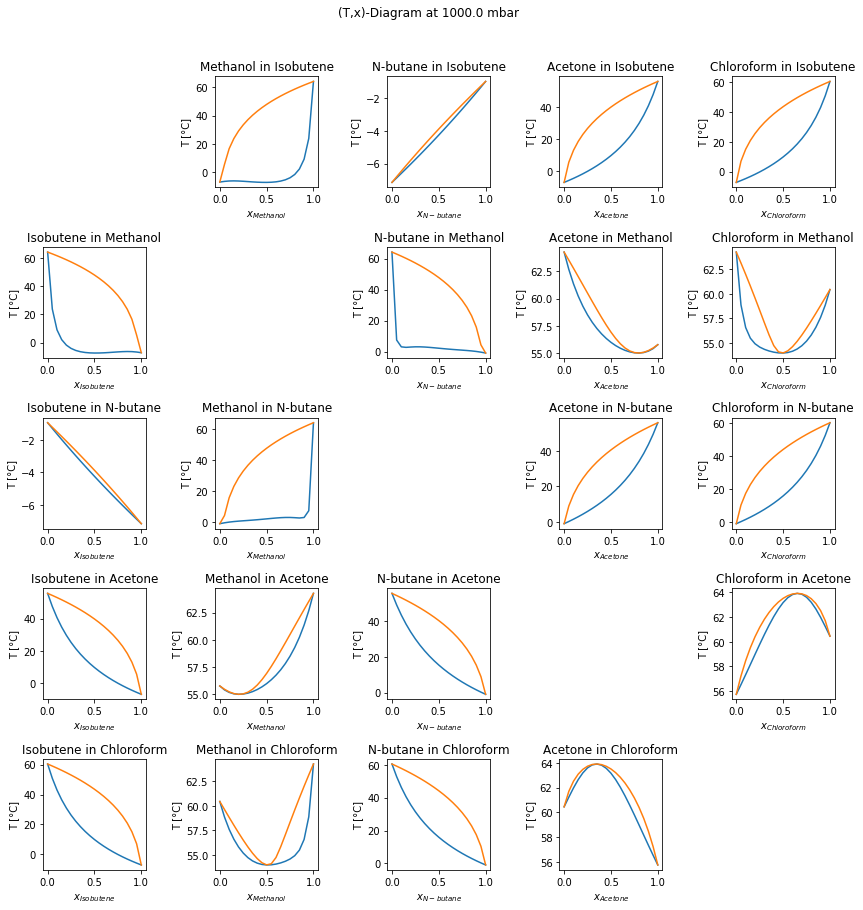

In [20]:
%%time
selectedComps=range(numComps)
numSelComps=len(selectedComps)
numSteps=21

mixtureBubble= fl.MaterialStream("MixB", sys)
mixtureBubble.Specify("VF",0.0)
mixtureBubble.Specify("P",psys, uom.METRIC.mbar)
for c in names:
    mixtureBubble.Specify("n["+c+"]",1.0)
mixtureBubble.InitializeFromMolarFlows()
mixtureBubble.FlashPZ()

mixtureDew= fl.MaterialStream("MixB", sys)
mixtureDew.Specify("VF",1.0)
mixtureDew.Specify("P",psys, uom.METRIC.mbar)
for c in names:
    mixtureDew.Specify("n["+c+"]",1.0)
mixtureDew.InitializeFromMolarFlows()
mixtureDew.FlashPZ()

flowTx= fl.Flowsheet("Txplot")
flowTx.AddMaterialStreams(mixtureBubble, mixtureDew)


fig,axs=plt.subplots(numSelComps,numSelComps,figsize=(12,12))
for i in range(numSelComps):
    for j in range(numSelComps):       
        if j!=i:
            xvec=[]
            yvec=[]
            yvec2=[]
            for c in range(numSteps):
                for k in range(numComps):                    
                    mixtureBubble.Specify("n["+names[k]+"]",0.0)
                    mixtureDew.Specify("n["+names[k]+"]",0.0)
                mixtureBubble.Specify("n["+names[i]+"]",c/(numSteps-1))
                mixtureBubble.Specify("n["+names[j]+"]",1.0-c/(numSteps-1))
                mixtureBubble.InitializeFromMolarFlows()
                mixtureBubble.FlashPZ()
                mixtureDew.Specify("n["+names[i]+"]",c/(numSteps-1))
                mixtureDew.Specify("n["+names[j]+"]",1.0-c/(numSteps-1))
                mixtureDew.InitializeFromMolarFlows()
                mixtureDew.FlashPZ()
                solver.Solve(flowTx)                               
                xvec.append(mixtureBubble.GetVariable('x['+names[selectedComps[j]]+']').Val())               
                yvec.append(mixtureBubble.GetVariable('T').Val()-273.15)               
                yvec2.append(mixtureDew.GetVariable('T').Val()-273.15)               
            axs[i,j].plot(xvec, yvec)
            axs[i,j].plot(xvec, yvec2)            
            axs[i,j].set_title(names[selectedComps[j]] +' in '+names[selectedComps[i]])
            axs[i,j].set_xlabel('$x_{'+names[selectedComps[j]]+'}$')       
            axs[i,j].set_ylabel('T [°C]')
            #axs[i,j].legend(['Bubble-Point', 'Dew-Point'])            
            #axs[i, j].set_aspect('equal', 'box')
        else:
            axs[i, j].axis('off')        
    
plt.tight_layout()
plt.suptitle('(T,x)-Diagram at '+str(round(psys,2))+' mbar', y=1.05);